In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [37]:
workers_answers = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_answers.csv")
workers_questionnaire = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_questionnaire.csv")
workers_dimensions_selection = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_dimensions_selection.csv")


In [30]:
workers_answers

,worker_id,paid,task_name,batch_name,unit_id,try_last,try_current,action,time_submit,time_submit_parsed,...,time_start,time_end,time_elapsed,time_start_parsed,time_end_parsed,accesses,global_outcome,global_form_validity,gold_checks,time_spent_check
0,7GFH0CXPHPTSPX,True,task1,batch1,unit_1,1,1,Next,"Tue, 16 Jan 2024 09:38:22 GMT",2024-01-16 09:38:22 00:00,...,1.705398e+09,1.705398e+09,137.07,2024-01-16 09:36:05,2024-01-16 09:38:22,1,True,True,True,True
1,7GFH0CXPHPTSPX,True,task1,batch1,unit_1,1,1,Next,"Tue, 16 Jan 2024 09:41:43 GMT",2024-01-16 09:41:43 00:00,...,1.705398e+09,1.705398e+09,201.00,2024-01-16 09:38:22,2024-01-16 09:41:43,1,True,True,True,True
2,7GFH0CXPHPTSPX,True,task1,batch1,unit_1,1,1,Next,"Tue, 16 Jan 2024 09:43:01 GMT",2024-01-16 09:43:01 00:00,...,1.705398e+09,1.705398e+09,78.06,2024-01-16 09:41:43,2024-01-16 09:43:01,1,True,True,True,True
3,7GFH0CXPHPTSPX,True,task1,batch1,unit_1,1,1,Next,"Tue, 16 Jan 2024 09:44:45 GMT",2024-01-16 09:44:45 00:00,...,1.705398e+09,1.705398e+09,104.07,2024-01-16 09:43:01,2024-01-16 09:44:45,1,True,True,True,True
4,7GFH0CXPHPTSPX,True,task1,batch1,unit_1,1,1,Finish,"Tue, 16 Jan 2024 09:45:59 GMT",2024-01-16 09:45:59 00:00,...,1.705398e+09,1.705398e+09,73.03,2024-01-16 09:44:45,2024-01-16 09:45:58,1,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,T4MEORG9STZITP,True,task1,batch1,unit_10,1,1,Back,"Tue, 16 Jan 2024 18:25:12 GMT",2024-01-16 18:25:12 00:00,...,1.705429e+09,1.705430e+09,125.46,2024-01-16 18:23:06,2024-01-16 18:25:12,1,True,True,True,True
83,T4MEORG9STZITP,True,task1,batch1,unit_10,1,1,Next,"Tue, 16 Jan 2024 18:25:16 GMT",2024-01-16 18:25:16 00:00,...,1.705429e+09,1.705429e+09,139.79,2024-01-16 18:20:46,2024-01-16 18:22:51,3,True,True,True,True
84,T4MEORG9STZITP,True,task1,batch1,unit_10,1,1,Next,"Tue, 16 Jan 2024 18:25:17 GMT",2024-01-16 18:25:17 00:00,...,1.705429e+09,1.705430e+09,126.40,2024-01-16 18:23:06,2024-01-16 18:25:12,2,True,True,True,True
85,T4MEORG9STZITP,True,task1,batch1,unit_10,1,1,Next,"Tue, 16 Jan 2024 18:27:16 GMT",2024-01-16 18:27:16 00:00,...,1.705430e+09,1.705430e+09,119.69,2024-01-16 18:25:17,2024-01-16 18:27:16,1,True,True,True,True


In [31]:
absolute_frequencies = workers_questionnaire['question_answer_text'].value_counts()
relative_frequencies = absolute_frequencies / len(workers_questionnaire)

average_confidence = workers_answers.groupby('document_index')['Confidence_value'].mean()
average_time_elapsed = workers_answers.groupby('document_index')['time_elapsed'].mean()

In [32]:
#da verificare
total_units = len(workers_answers)
matching_units = workers_answers[workers_answers['Reliability_value'] == workers_answers['Reliability_value']].shape[0]

percent_agreement = (matching_units / total_units) * 100

In [33]:
# Inizializza una lista per i risultati
result_list = []

# Cicla sui valori unici della colonna document_id
for doc_id in workers_answers['document_id'].unique():
    # Filtra il DataFrame per il documento corrente
    doc_df = workers_answers[workers_answers['document_id'] == doc_id]

    # Conserva solo la prima risposta per ogni worker_id
    unique_worker_ids = doc_df['worker_id'].unique()
    for worker_id in unique_worker_ids:
        first_answer_idx = doc_df[doc_df['worker_id'] == worker_id].index[0]
        first_answer_row = doc_df.loc[first_answer_idx]
        result_list.append({'document_id': doc_id, 'Neutrality_index': first_answer_row['Neutrality_index']})

# Crea un DataFrame dai risultati
result_df = pd.DataFrame(result_list)
#print(result_df)# Visualizza il DataFrame risultante
print(result_df)

# Raggruppa per document_id e calcola la percentuale di accordo
grouped_df = result_df.groupby('document_id')['Neutrality_index'].value_counts(normalize=True).mul(100).unstack().fillna(0)

# Visualizza il DataFrame risultante
#print(grouped_df)

   document_id  Neutrality_index
0   B015XC3B46               3.0
1   B015XC3B46               1.0
2   B015XC3B46               1.0
3   B015XC3B46               3.0
4   B0002KMHD6               2.0
..         ...               ...
65  B00QTSR5GO               4.0
66  B00QTSR5GO               3.0
67  B00QTSR5GO               4.0
68  B00QTSR5GO               3.0
69  B00QTSR5GO               2.0

[70 rows x 2 columns]


In [34]:
grouped_df = result_df.groupby(['document_id', 'Neutrality_index']).size().reset_index(name='counts')

# Crea un DataFrame pivot per avere le Neutrality_description come colonne
pivot_df = grouped_df.pivot(index='document_id', columns='Neutrality_index', values='counts').fillna(0)

# Calcola la percentuale di accordo per ciascun document_id
total_documents = pivot_df.shape[0]
matching_values = pivot_df.apply(lambda row: row.max(), axis=1)
percent_agreement = (matching_values / total_documents) * 100

# Visualizza il DataFrame risultante con la percentuale di accordo per ciascun document_id
result_percent_df = pd.DataFrame({'document_id': percent_agreement.index, 'Percent_Agreement': percent_agreement.values})

print(result_percent_df)

   document_id  Percent_Agreement
0   B00004SVUZ          20.000000
1   B00006JN5L          13.333333
2   B0001DHQPI          13.333333
3   B0002KMHD6          26.666667
4   B000O39U3Q          13.333333
5   B001DYVHY0          13.333333
6   B0029MAXR2          13.333333
7   B003TO59D2          20.000000
8   B0041RUM0Q          13.333333
9   B0050SYWGU          13.333333
10  B005ZNWT4C          20.000000
11  B00PNVOBTC          13.333333
12  B00QTSR5GO          13.333333
13  B015XC3B46          13.333333
14  B01G6LXXWI           6.666667


In [35]:
grouped_df = result_df.groupby(['document_id', 'Neutrality_index']).size().reset_index(name='counts')

# Crea un DataFrame pivot per avere le Neutrality_description come colonne
pivot_df = grouped_df.pivot(index='document_id', columns='Neutrality_index', values='counts').fillna(0)

# Calcola il pairwise agreement per ciascun document_id
total_documents = pivot_df.shape[0]
pairwise_agreement = 2 * pivot_df.apply(lambda row: row.max(), axis=1) / (total_documents * (total_documents - 1))

# Visualizza il DataFrame risultante con il pairwise agreement per ciascun document_id
result_pairwise_df = pd.DataFrame({'document_id': pairwise_agreement.index, 'Pairwise_Agreement': pairwise_agreement.values})

print(result_pairwise_df)

   document_id  Pairwise_Agreement
0   B00004SVUZ            0.028571
1   B00006JN5L            0.019048
2   B0001DHQPI            0.019048
3   B0002KMHD6            0.038095
4   B000O39U3Q            0.019048
5   B001DYVHY0            0.019048
6   B0029MAXR2            0.019048
7   B003TO59D2            0.028571
8   B0041RUM0Q            0.019048
9   B0050SYWGU            0.019048
10  B005ZNWT4C            0.028571
11  B00PNVOBTC            0.019048
12  B00QTSR5GO            0.019048
13  B015XC3B46            0.019048
14  B01G6LXXWI            0.009524


In [36]:
# Raggruppa per document_id e conta le occorrenze di ciascun valore Neutrality_description
grouped_df = result_df.groupby(['document_id', 'Neutrality_index']).size().reset_index(name='counts')

# Crea un DataFrame pivot per avere le Neutrality_description come colonne
pivot_df = grouped_df.pivot(index='document_id', columns='Neutrality_index', values='counts').fillna(0)

# Aggiungi una colonna con la somma totale delle risposte per ciascun document_id
pivot_df['Total'] = pivot_df.sum(axis=1)



# Visualizza il DataFrame risultante
print(pivot_df)

Neutrality_index  0.0  1.0  2.0  3.0  4.0  Total
document_id                                     
B00004SVUZ        0.0  1.0  1.0  3.0  0.0    5.0
B00006JN5L        2.0  0.0  2.0  0.0  1.0    5.0
B0001DHQPI        1.0  2.0  0.0  2.0  0.0    5.0
B0002KMHD6        0.0  0.0  1.0  4.0  0.0    5.0
B000O39U3Q        1.0  1.0  0.0  2.0  1.0    5.0
B001DYVHY0        0.0  1.0  0.0  2.0  2.0    5.0
B0029MAXR2        0.0  2.0  1.0  2.0  0.0    5.0
B003TO59D2        3.0  2.0  0.0  0.0  0.0    5.0
B0041RUM0Q        0.0  0.0  0.0  2.0  2.0    4.0
B0050SYWGU        0.0  0.0  1.0  2.0  1.0    4.0
B005ZNWT4C        3.0  0.0  0.0  1.0  0.0    4.0
B00PNVOBTC        0.0  0.0  1.0  2.0  1.0    4.0
B00QTSR5GO        0.0  0.0  1.0  2.0  2.0    5.0
B015XC3B46        0.0  2.0  0.0  2.0  0.0    4.0
B01G6LXXWI        1.0  1.0  1.0  1.0  1.0    5.0


In [26]:
somma = 0
lista = []
for document_id in pivot_df:
    for j in pivot_df[document_id]:
        somma += j*(j-1)

    lista[document_id]
result = somma /20

print(result)


TypeError: list indices must be integers or slices, not float

In [91]:
time_media = workers_answers[['worker_id', 'document_id', 'time_start', 'time_end']]
time_media = time_media.copy()
time_media['time_spedn'] = time_media['time_end'] - time_media['time_start']
time_media = time_media.drop(['time_start', 'time_end'], axis=1)
display(time_media)

,worker_id,document_id,time_spedn
0,7GFH0CXPHPTSPX,B015XC3B46,137.07
1,7GFH0CXPHPTSPX,B0002KMHD6,201.01
2,7GFH0CXPHPTSPX,B00006JN5L,78.06
3,7GFH0CXPHPTSPX,B0001DHQPI,104.06
4,7GFH0CXPHPTSPX,B001DYVHY0,73.04
...,...,...,...
82,T4MEORG9STZITP,B00PNVOBTC,125.46
83,T4MEORG9STZITP,B015XC3B46,125.06
84,T4MEORG9STZITP,B00PNVOBTC,125.46
85,T4MEORG9STZITP,B0041RUM0Q,119.69


In [94]:

#Calcoliamo il tempo medio per worker
tempo_medio_W = time_media.groupby('worker_id')['time_spedn'].mean()
display(tempo_medio_W)

#Calcoliamo il tempo medio per documento
tempo_medio_D = time_media.groupby('document_id')['time_spedn'].mean()
display(tempo_medio_D)




worker_id
7GFH0CXPHPTSPX    118.648000
B0ARNFCRSNEXAS    153.752000
B3QHTCHNCMXQ4H     81.260000
CNZQBVRXLWYZG8    119.153333
DLNY6ZIJOABZLJ    207.452000
HAA3KNPKCB5DSG    844.542000
ISGHMQO0AXKFXS    118.063333
IZ2TQI5OCUGD1N    289.696000
JLVBHXOL0E65XT    121.256000
KWJ2MEMELZHTD1    130.682727
L292E0RLKG4B7U    238.840000
MXLX3Z0LDZTDTY    451.120000
OMLUXZWFN4LV8O    344.378000
T4MEORG9STZITP    195.378889
Name: time_spedn, dtype: float64

document_id
B00004SVUZ     238.127143
B00006JN5L      66.731667
B0001DHQPI     396.858000
B0002KMHD6     279.677143
B000O39U3Q     112.948333
B001DYVHY0     139.556000
B0029MAXR2     225.012000
B003TO59D2     275.245000
B0041RUM0Q     196.190000
B0050SYWGU     135.215000
B005ZNWT4C    1120.625000
B00PNVOBTC     185.670000
B00QTSR5GO     112.741250
B015XC3B46      69.405556
B01G6LXXWI     214.120000
Name: time_spedn, dtype: float64

In [95]:
# vado a selezionare solo le colonne che voglio
selected_columns = ['worker_id','document_id', 'selection_value']

# Crea un nuovo dataframe includendo solo le colonne selezionate
dimensions_selections = workers_dimensions_selection[selected_columns].copy()

#media valutazione data per ogni documento, ( slider )
media_valutazioni_D = dimensions_selections.groupby('document_id')['selection_value'].mean()
display(media_valutazioni_D)

#media valutazione data per ogni documento, da ogni worker, ( slider )
media_valutazioni_W = dimensions_selections.groupby('worker_id')['selection_value'].mean()
display(media_valutazioni_W)

document_id
B00004SVUZ    49.431818
B00006JN5L    39.500000
B0001DHQPI    75.833333
B0002KMHD6    42.166667
B000O39U3Q    80.400000
B001DYVHY0    78.428571
B0029MAXR2    76.000000
B003TO59D2    33.250000
B0041RUM0Q    69.160000
B0050SYWGU    77.833333
B005ZNWT4C    84.000000
B00PNVOBTC    56.000000
B00QTSR5GO    86.000000
B015XC3B46    59.500000
B01G6LXXWI    56.125000
Name: selection_value, dtype: float64

worker_id
7GFH0CXPHPTSPX    58.800000
B0ARNFCRSNEXAS    69.142857
B3QHTCHNCMXQ4H    85.000000
CNZQBVRXLWYZG8    87.142857
DLNY6ZIJOABZLJ    54.000000
HAA3KNPKCB5DSG    92.500000
ISGHMQO0AXKFXS    67.000000
IZ2TQI5OCUGD1N    94.111111
JLVBHXOL0E65XT    65.571429
KWJ2MEMELZHTD1    44.560440
L292E0RLKG4B7U    48.875000
MXLX3Z0LDZTDTY    80.000000
OMLUXZWFN4LV8O    30.566667
T4MEORG9STZITP    63.875000
Name: selection_value, dtype: float64

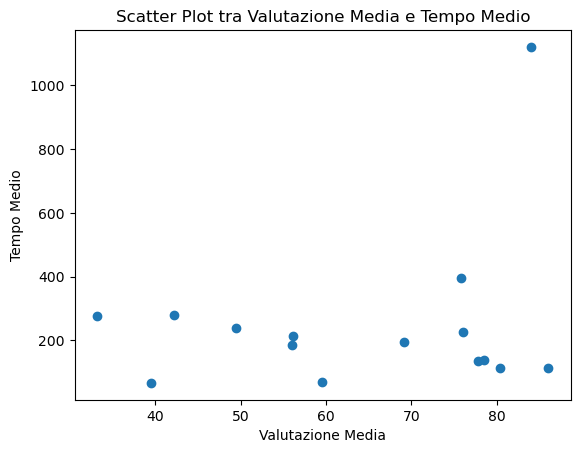

,valutazione_media,tempo_medio
document_id,,
B00004SVUZ,49.431818,238.127143
B00006JN5L,39.500000,66.731667
B0001DHQPI,75.833333,396.858000
B0002KMHD6,42.166667,279.677143
B000O39U3Q,80.400000,112.948333
B001DYVHY0,78.428571,139.556000
B0029MAXR2,76.000000,225.012000
B003TO59D2,33.250000,275.245000
B0041RUM0Q,69.160000,196.190000


In [100]:
import pandas as pd
import matplotlib.pyplot as plt

#unisco i due dataframe per avere valutazione medi e tempo medio per ogni docuemnto
merged_dataset = pd.merge(media_valutazioni_D, tempo_medio_D, on='document_id')

merged_dataset = merged_dataset.rename(columns={'selection_value': 'valutazione_media',
                                                'time_spedn': 'tempo_medio'})

# Crea il grafico
plt.scatter(merged_dataset['valutazione_media'], merged_dataset['tempo_medio'])
plt.xlabel('Valutazione Media')
plt.ylabel('Tempo Medio')
plt.title('Scatter Plot tra Valutazione Media e Tempo Medio')
plt.show()

'''
Un'analisi può esser che non si notano correlazioni con tempo e valutazione, nel senso che una valutazione alta non equivale a un tempo medio elevato di rispota,
anche se poteva esser cosi perche per avere una valutazione alta, la recensione deve essere molto prolissa e ben sturitturata, quindi ci vuoleva mooto tempo ma non  e coi.
'''


display(merged_dataset)